# Dinamikai rendszerek 2019/2020 EF

## Példák
-----

Ebben a notebookban bemutatunk pár egyszerű példát ami segíthet a feladatlapok megoldásában.
A fájlt időről-időre **frissítjük** új példákkal. (Keress rá a laborok dátumaira)



## Tartalomjegyzék  
----
[2019/10/10-Alapok](#2019/10/10-Alapok)  
[2019/10/17-Grafikonok](#2019/10/17-Grafikonok)  
[2019/10/24-Differenciálegyenletek](#2019/10/24-Differenciálegyenletek)  
[2019/10/31-Kétdimenziós-dinamikai-rendszerek](#2019/10/31-Kétdimenziós-dinamikai-rendszerek)  
[2019/11/21-Tesztelés,-benchmarking](#2019/11/21-Tesztelés,-benchmarking)  
[2019/11/28-Körök,-felületek-és-kontúrok](#2019/11/28-Körök,-felületek-és-kontúrok)  
[2019/12/05-Vektorok,-animációk](#2019/12/05-Vektorok,-animációk)

---

## 2019/10/10 Alapok
[FEL](#Tartalomjegyzék)

### Függvények

In [3]:
function func(x)
    return x*sin(x)
end

func (generic function with 1 method)

Függvény alkalmazása tömb minden elemére:
```julia
func.(array)
```
A függvény neve után pontot kell tenni.

In [4]:
x=1:0.01:50;

func.(x) 

4901-element Array{Float64,1}:
   0.8414709848078965
   0.8553001630641953
   0.8691501823883503
   0.8830179588642615
   0.896900396333072 
   0.9107943868737178
   0.9246968112856855
   0.9386045395739094
   0.9525144314357433
   0.9664233367499412
   0.9803280960675791
   0.994225541104853 
   1.0081124952376859
   ⋮                 
 -18.29573148230491  
 -17.83425640081835  
 -17.37081112137878  
 -16.905441282690852 
 -16.438192734663645 
 -15.969111533892395 
 -15.498243939120627 
 -15.025636406680249 
 -14.551335585906939 
 -14.075388314537694 
 -13.597841614085615 
 -13.118742685196437 

### Grafikonok készítése

 Első alkalommal szükséges a `Plots` csomag telepítése is: 
 ```julia
 using Pkg; Pkg.add("Plots")
 ```


In [ ]:
using Pkg; Pkg.add("Plots")

In [1]:
using Plots #importaljuk a Plots csomagot

Ábrázolom a függvényemet:

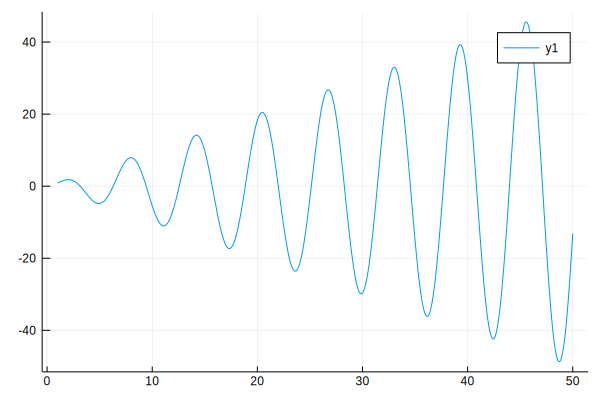

In [6]:
plot(x,func.(x))

Formázással "érthetővé" tesszük a grafikont. **Ezt a feladatlapokban is el kell végezni!**

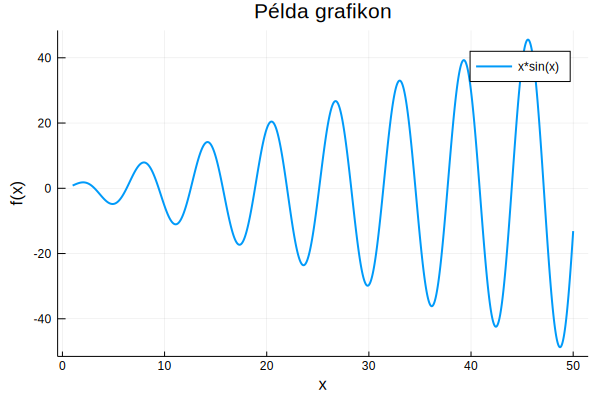

In [7]:
plot(x,func.(x),lw=2,xlabel="x",ylabel="f(x)",label="x*sin(x)",title="Példa grafikon")

Haladó szint. A formázást egy szinttel tovább vihetjük a LaTeX segítségével:

In [8]:
using Pkg; Pkg.add("LaTeXStrings") #ezt csak eloszor kell elvegezni

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %0 %.8 %                         ]  35.6 % [====================>                    ]  49.5 %>           ]  71.0 %==================================>      ]  84.9 %>]  98.6 % Resolving package versions...
 Installed DataAPI ────────────── v1.1.0
 Installed Missings ───────────── v0.4.3
 Installed BlockBandedMatrices ── v0.5.1
 Installed BandedMatrices ─────── v0.12.3
 Installed MatrixFactorizations ─ v0.2.0
 Installed CategoricalArrays ──── v0.7.1
 Installed PlotUtils ──────────── v0.6.0
 Installed PlotlyJS ───────────── v0.13.0
 Installed NLSolversBase ──────── v7.5.0
 Installed DocStringExtensions ── v0.8.1
 Installed DiffEqBase ─────────── v6.3.4
 Installed BlockArrays ────────── v0.10.0
 Installed LazyArrays ─────────── v0.12.2
 Installed PlotlyBase ─────────── v0.3.0
 Installed DataStructures ───

In [9]:
Pkg.add("LaTeXStrings")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [10]:
using LaTeXStrings #importaljuk a LaTeXString csomagot

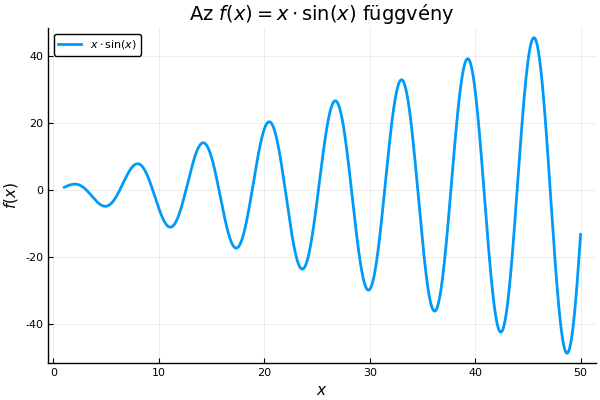

In [11]:
pyplot(); plot(x,func.(x),lw=2,
    xlabel=L"x",ylabel=L"$f(x)$",label=L"$x\cdot \sin(x)$",title=L"Az $f(x)=x\cdot \sin(x)$ függvény")

A LaTeX ismerete nem kötelező, de érdemes megtanulni.

Ha több függvényt akarunk egy ábrára tenni akkor a `plot!()` parancsot kell alkalmazni.

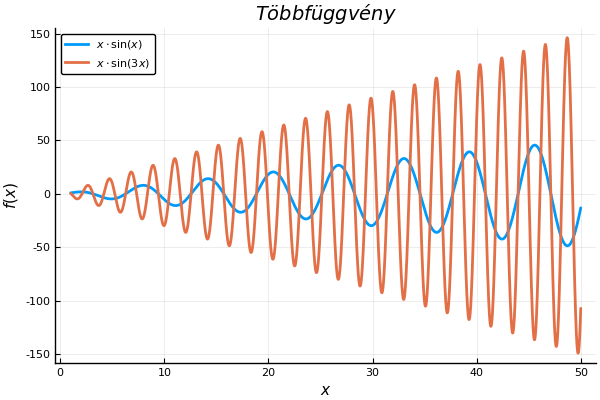

In [8]:
plot!(x,func.(3 .*x),lw=2,label=L"$x\cdot \sin(3x)$",title=L"Több függvény")

A tengelyeket áthelyezhetjük középre:

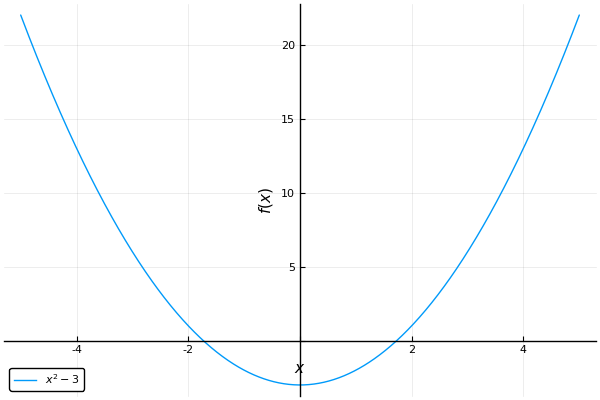

In [34]:
plot(-5:0.01:5.,(-5:0.01:5.).^2 .-3,framestyle= :origin,label=L"$x^2-3$",xlabel=L"x",ylabel=L"f(x)")

Illetve lehet logaritmikus skálán is ábrázolni:

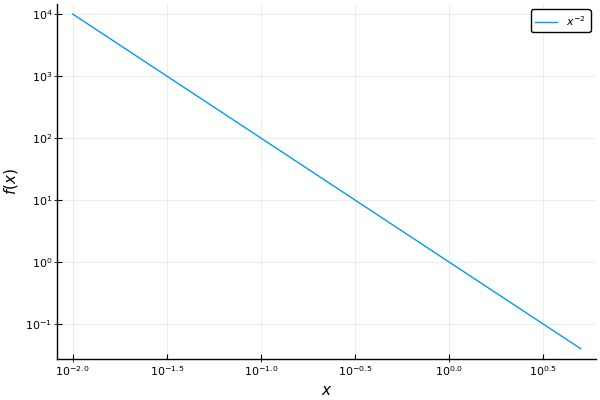

In [36]:
plot(0.01:0.01:5.,(0.01:0.01:5.).^(-2),label=L"$x^{-2}$",xlabel=L"x",ylabel=L"f(x)",xaxis= :log,yaxis= :log)

## 2019/10/17 Grafikonok
[FEL](#Tartalomjegyzék)

### Színek, tengelyek 'linestyle' stb.

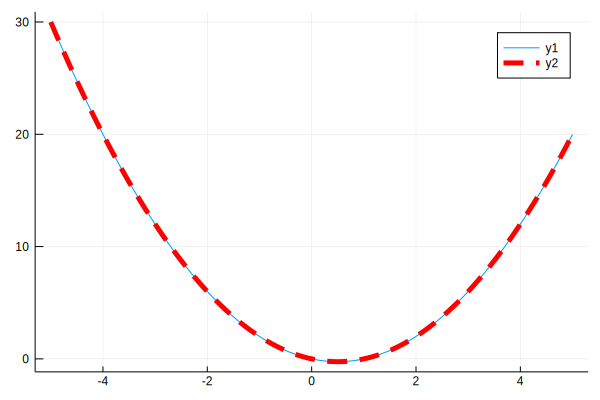

In [2]:
x=-5:0.01:5;
#egyszeru abrazolas:
plot(x,x.^2 .-x);
#formazom a vonalat
plot!(x,x.^2 .-x,linestyle= :dash, linecolor= :red, linewidth=5)


###  Ábrázolás `for` ciklusban

Ábrázoljuk az $x^n$ függvényt különböző $n$-re:

In [72]:
n=[0,1,2,3,4]; #ezek lesznek az indexeim
x=-2:0.01:2;
plot(); #egy ures plotot csinalok

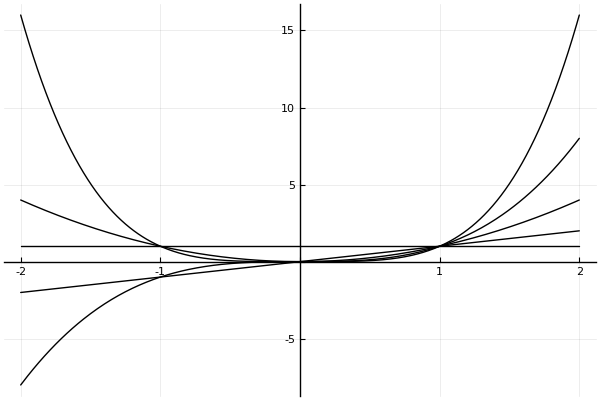

In [73]:
#ellentétben a C-vel például, itt a ciklusváltozó lehet maga a tömb eleme is. nem kell indexekkel hivatkozni ra
for i in n
    p=plot!(x,x.^i,linecolor= :black, legend=false,framestyle= :origin);
    # ugyanazt a szint hasznalom hogy ne legyen tul tarka az abra
end
display(p)
#ezzel jelenitem meg a plot-ok eredmenyeit kulonben nem lesz lathat a ciklus miatt
    

Egy másik példa a `plot` és a ciklusok használatára: az $e^x$ megközelítése hatványsorokkal.

In [68]:
n=[0,1,2,3,4];
x=-3:0.01:3;
using LaTeXStrings; pyplot()

plot(x,exp.(x),label=L"$e^x$",framestyle= :origin, linewidth=3, linecolor= :black,ylims=(0,10));
#ylims=(a,b) - az Y tengely hatarit allitja be

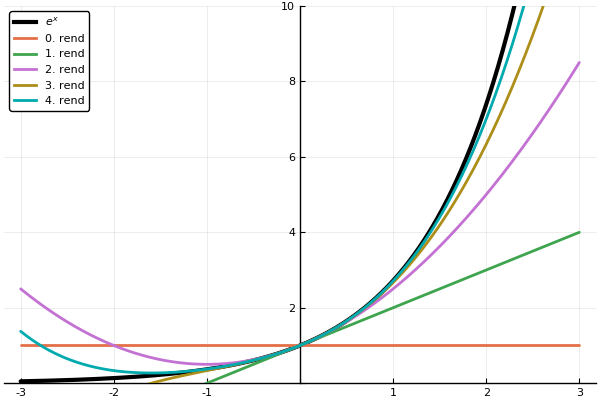

In [69]:

for i in n
    y=x.*0
    j=0
    while j<=i
        y=y+(x.^j)./factorial(j)
        j=j+1
    end
    p=plot!(x,y,label="$(j-1). rend",lw=2)
end
display(p)        

## 2019/10/24 Differenciálegyenletek
[FEL](#Tartalomjegyzék)

###  `DifferentialEquations` csomag használata

Részletes útmutatóhoz lásd a dokumentaciót [itt](http://docs.juliadiffeq.org/latest/tutorials/ode_example.html).

### Egydimenziós differenciálegyenlet megoldása

In [1]:
#using Pkg
#using Pkg.add("DifferentialEquations")
using DifferentialEquations

Az általános rendszer így néz ki:
$$
\dot{u}=f(u,p,t),
$$
ahol $u$ a változó, $p$ paraméter, $t$ az idő.  
A példaegyenlet: 
$$
\dot{u}=\alpha u,~t\in[0,1].
$$

In [2]:
f(u,p,t)=p*u #a t fugges most hianyzik
u0=0.5 #kezdeti ertek
p=1.01 # a parameter
tspan=(0.0,1.0) #az idohatarok
prob=ODEProblem(f,u0,tspan,p) #itt definialtam egy kozonseges differencialegyenlet feladatot ahogy f a fuggvenyem, 
# u0 a kezdeti ertek, p  a parameterem, es tspan kozott oldom meg

sol=solve(prob) #ennyi a megoldas


retcode: Success
Interpolation: Automatic order switching interpolation
t: 5-element Array{Float64,1}:
 0.0                
 0.09964258706516003
 0.3457030604980719 
 0.6776923233260352 
 1.0                
u: 5-element Array{Float64,1}:
 0.5               
 0.552938681151017 
 0.7089380797962724
 0.9913595829297396
 1.3728004409038075

In [3]:
#Success, vagyis mukodik
sol.t #ez tartalmazza az idolepeseket

5-element Array{Float64,1}:
 0.0                
 0.09964258706516003
 0.3457030604980719 
 0.6776923233260352 
 1.0                

In [4]:
sol.t[3] #a 3. idopont

0.3457030604980719

In [5]:
sol.u #ez tartalmazza az u(t)-t a megfelelo pontokban

5-element Array{Float64,1}:
 0.5               
 0.552938681151017 
 0.7089380797962724
 0.9913595829297396
 1.3728004409038075

In [6]:
sol.u[4]

0.9913595829297396

In [7]:
# a sol interplolalni is tud
sol(0.94) #vagyis nincs a megoldasban 0.94-es ido de interpolalassal kiszamolom

1.2920789789545017

In [8]:
using Plots

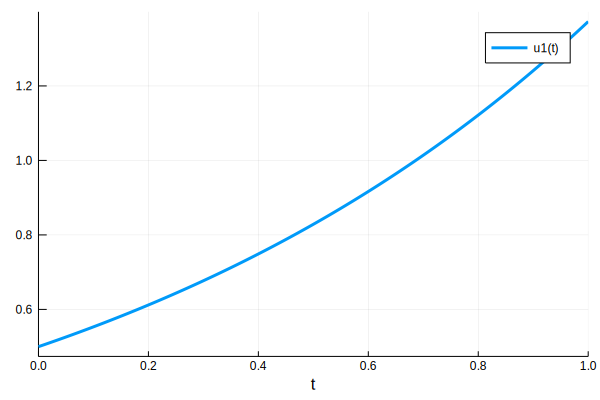

In [9]:
#abrazolas
plot(sol) #ennyi, persze formazni is kell :)

Ha több paraméterre vagy kezdetiállapotra is szeretnék eredményeket akkor a `remake` függvényt használom:

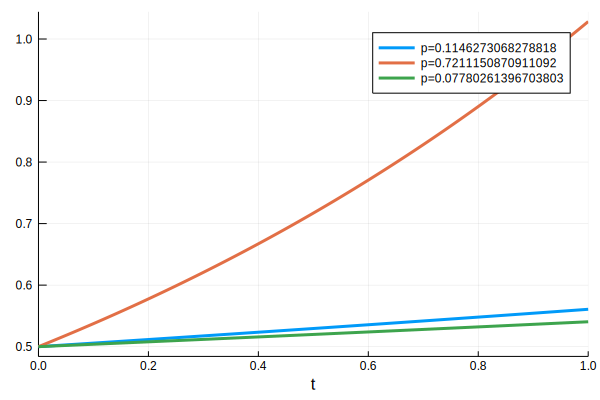

In [10]:
plot();
for i in 1:3
    a=rand()
    prob=remake(prob;p=a) # valtoztatom a prob feladat p parameteret
    sol=solve(prob)
    pl=plot!(sol,label="p=$a")
end
plot!()

### Többdimenziós rendszer

In [11]:
function f!(du,u,p,t) #in-place fuggvenyt hasznalok, vagyis helyben valtoztatom a du-t es igy gyorsabban fut le a kod
    du[1]=2*u[1]-u[2]*u[1]
    du[2]=-p*u[2] +u[1]*u[2]
end
u0=[2.,1.]
p=1.5
tspan=(0.,1.)
prob=ODEProblem(f!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: [2.0, 1.0]

In [12]:
sol=solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 7-element Array{Float64,1}:
 0.0                
 0.09062431225898603
 0.25411462217984515
 0.4534488075220706 
 0.7282658989170143 
 0.9620211533824803 
 1.0                
u: 7-element Array{Array{Float64,1},1}:
 [2.0, 1.0]        
 [2.18459, 1.0551] 
 [2.51971, 1.21303]
 [2.86095, 1.54127]
 [2.94779, 2.29914]
 [2.50407, 3.08838]
 [2.39743, 3.20199]

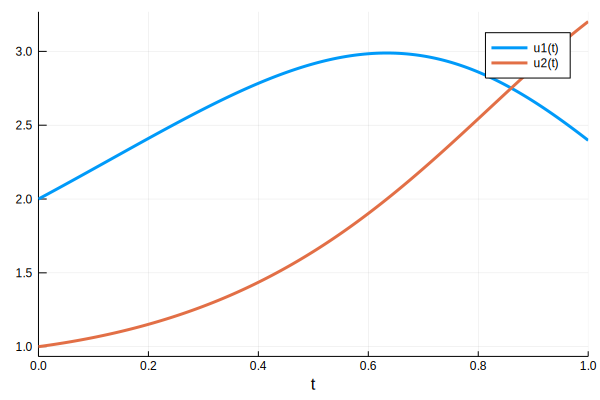

In [13]:
using Plots
plot(sol)

## 2019/10/31 Kétdimenziós dinamikai rendszerek
[FEL](#Tartalomjegyzék)

Adott a következő kétdimenziós lináris dinamikai rendszer:
$$
\begin{align}
\dot{x}&=3x+4y\\
\dot{y}&=4x-3y.
\end{align}
$$
Határozzuk meg a rendszer fixpontjának stabilitását és ábrázoljuk a fázisportrét!

A rendszer átírható egy mátrix-vektor szorzatra:
$$
\begin{pmatrix}
\dot{x}\\
\dot{y}
\end{pmatrix}
=
\begin{pmatrix}
3 & 4 \\
4 & -3
\end{pmatrix}
\cdot
\begin{pmatrix}
x \\
y
\end{pmatrix}
$$
Megkeressük a mátrix sajátértékeit a stabilitáshoz:

In [10]:
A=[[3. 4.]; [4. -3.]]

2×2 Array{Float64,2}:
 3.0   4.0
 4.0  -3.0

In [11]:
# using Pkg
# Pkg.add("LinearAlgebra") -ezeket eloszor le kell futtatni
using LinearAlgebra

Két út létezik:
* `eigvals`- megadja a sajátértékeket, `eigvecs` - megadja a sajátvektorokat egy mátrixban, viszont nem biztos hogy az ugyanabban a sorrendben lesznek a sajátértékek és a sajátvektorok
* `eigen` egyszerre téríti vissza a sajátértékeket és a sajátvektorokat. (`F.values`, `F.vectors`)

In [21]:
e=eigvals(A)

2-element Array{Float64,1}:
 -5.0
  5.0

Úgy néz ki nyeregpontunk van. (Látható, hogy ennyire elég az `eigvals` függvény is)

In [14]:
vec_a=eigvecs(A)

2×2 Array{Float64,2}:
  0.447214  -0.894427
 -0.894427  -0.447214

In [19]:
a1=vec_a[:,1] #az elso sajatvektor

2-element Array{Float64,1}:
  0.4472135954999579
 -0.8944271909999159

In [20]:
a2=vec_a[:,2] #az masodik sajatvektor

2-element Array{Float64,1}:
 -0.8944271909999159
 -0.4472135954999579

Ellenőrizzük az eredményt:

In [61]:
(e[1] .*a1) ≈ A*a1  #ezt a jelet ugy kapjuk ha az \approx utan TAB-ot nyomunk. Ez mukodik a gorog karakterekkel \alpha, \beta stb

true

Megegyezik.

Most használjuk az `eigen` függvényt:

In [26]:
F=eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
2-element Array{Float64,1}:
 -5.0
  5.0
eigenvectors:
2×2 Array{Float64,2}:
  0.447214  -0.894427
 -0.894427  -0.447214

In [27]:
F.values # a sajatertekek

2-element Array{Float64,1}:
 -5.0
  5.0

In [28]:
F.vectors # a sajatvektorok megfelelo sorrendben

2×2 Array{Float64,2}:
  0.447214  -0.894427
 -0.894427  -0.447214

In [30]:
F.vectors[:,1]

2-element Array{Float64,1}:
  0.4472135954999579
 -0.8944271909999159

In [31]:
F.vectors[:,2]

2-element Array{Float64,1}:
 -0.8944271909999159
 -0.4472135954999579

Most megoldjuk a rendszert és trajektóriákat ábrázolunk:

In [56]:
#using DifferentialEquations
u0=rand(2).*2 .-1.
tspan=(0.,0.25)
#Ezt linearis rendszereknel erdemes:
f(u,p,t) = A*u
prob=ODEProblem(f,u0,tspan)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: false
timespan: (0.0, 0.25)
u0: [-0.0818889, -0.767006]

In [43]:
sol=solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 10-element Array{Float64,1}:
 0.0                 
 0.052542481212233094
 0.1218216154577342  
 0.2058158091864481  
 0.3055235231713577  
 0.4196600981244984  
 0.5476476667384806  
 0.6882641181276744  
 0.8403992512101862  
 1.0                 
u: 10-element Array{Array{Float64,1},1}:
 [-1.13929, -0.717553]
 [-1.51304, -0.870256]
 [-2.17154, -1.1662]  
 [-3.33272, -1.71921] 
 [-5.50867, -2.78644] 
 [-9.7629, -4.89959]  
 [-18.5239, -9.27151] 
 [-37.4232, -18.7164] 
 [-80.0776, -40.041]  
 [-177.859, -88.9307] 

In [60]:
#using Plots
#using LaTeXStrings
plot();
for i in 1:200
    sol=solve(prob)
    plot!(sol,vars=(1,2),lc=:black,lw=0.5,framestyle=:origin,legend=false,arrow=:arrow)
    prob=remake(prob; u0=rand(2).*2 .-1.)
end
plot!(xlabel=L"x",ylabel=L"y",xlim=[-4,4],ylim=[-2.,2.])

## 2019/11/21 Tesztelés, benchmarking
[FEL](#Tartalomjegyzék)

Telepítjük a `BenchmarkTools` modult.  
```julia
using Pkg
Pkg.add("BenchmarkTools")
using BenchmarkTools
```


A futási idő és a felhasznált memóriát `@benchmark` makró segítségével kapjuk meg:

In [1]:
using BenchmarkTools
@benchmark sin(1.0)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     11.992 ns (0.00% GC)
  median time:      12.025 ns (0.00% GC)
  mean time:        12.073 ns (0.00% GC)
  maximum time:     56.093 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     999

Látható hányszor futott le a program és mennyi memóriát használt. Visszakapjuk továbbá a futási idők minimumát, maximumát átlagát és mediánját.

Teszteljünk most egy másik függvényt:

In [24]:
function f(n)
    a=rand(n)
    for i in a
        i*i
    end
end

f (generic function with 1 method)

In [25]:
@benchmark f(100)

BenchmarkTools.Trial: 
  memory estimate:  896 bytes
  allocs estimate:  1
  --------------
  minimum time:     273.755 ns (0.00% GC)
  median time:      303.662 ns (0.00% GC)
  mean time:        393.526 ns (16.74% GC)
  maximum time:     178.864 μs (99.69% GC)
  --------------
  samples:          10000
  evals/sample:     359

A `@benchmarkable` makró segítségével több dolgot is beállíthatunk:

In [30]:
a = @benchmarkable f(100) samples=100 seconds=3.0
#100-szor futtatom a fuggvenyt, de legfeljebb 3 másodpercig tarthat a teszt hiába nincs meg a 100 futás

Benchmark(evals=1, seconds=3.0, samples=100)

In [31]:
run(a)

BenchmarkTools.Trial: 
  memory estimate:  896 bytes
  allocs estimate:  1
  --------------
  minimum time:     149.000 ns (0.00% GC)
  median time:      252.500 ns (0.00% GC)
  mean time:        581.120 ns (0.00% GC)
  maximum time:     11.461 μs (0.00% GC)
  --------------
  samples:          100
  evals/sample:     1

Látható hogy nem ugyanazok az értékek jönnek ki, úgyhogy megéri többször futtatni

In [28]:
a = @benchmarkable f(100) samples=100000 seconds=20.0

Benchmark(evals=1, seconds=20.0, samples=100000)

In [29]:
run(a)

BenchmarkTools.Trial: 
  memory estimate:  896 bytes
  allocs estimate:  1
  --------------
  minimum time:     137.000 ns (0.00% GC)
  median time:      186.000 ns (0.00% GC)
  mean time:        483.549 ns (5.39% GC)
  maximum time:     2.613 ms (99.83% GC)
  --------------
  samples:          100000
  evals/sample:     1

## 2019/11/28 Körök, felületek és kontúrok
[FEL](#Tartalomjegyzék)

Sokszor hasznos bizonyos síkidomokat ábrázolni, pl. a Poincaré-Bendixson tétel használatakor. Ebben a példában kört fogunk ábrázolni, egy kis trükköt alkalmazva, mivel nincs előre erre a célra megírt függvény (jelenleg):


In [1]:
function circleShape(x,y,R)
    #(x,y) kozeppontu es R sugaru kor
    θ=LinRange(0,2*π,500)
    x.+R*cos.(θ),y.+R*sin.(θ)
end

circleShape (generic function with 1 method)

In [2]:
#using Plots

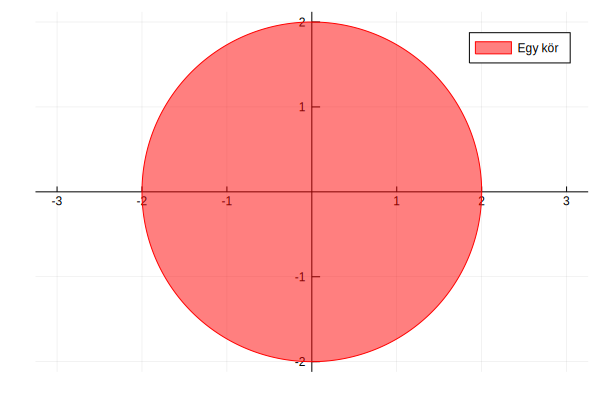

In [12]:
plot(circleShape(0,0,2), #a kort alkoto pontok
    lc=:red,             #a kerulet szine
    c=:red,              #belso resz szine
    seriestype=:shape,   #ezzel kitolti
    fillalpha=0.5,       #a kozepso resz atlathatosaga (1-atlatszatlan)
    aspect_ratio=1,      
    framestyle=:origin,
    label="Egy kör")

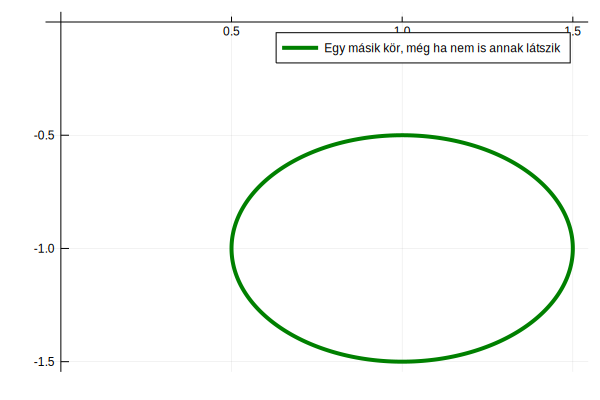

In [22]:
plot(circleShape(1,-1,0.5),
    lw=4,
    lc=:green,             
    #aspect_ratio=1,      
    framestyle=:origin,
    label="Egy másik kör, még ha nem is annak látszik")

### 3D Plot


Felületek és háromváltozós függvények esete:

In [24]:
V(x,y)=cos(x-y)*sin(x)*y^2

V (generic function with 1 method)

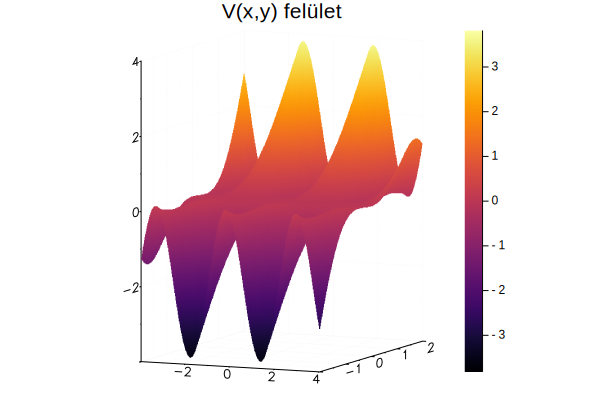

In [41]:
x=-4:0.1:4;
y=-2:0.1:2;
plot(x,y,V,
    st=:surface,    #ezzel lesz felulet
    camera=(30,15), #ez a forgatasi szog
    title="V(x,y) felület"
)

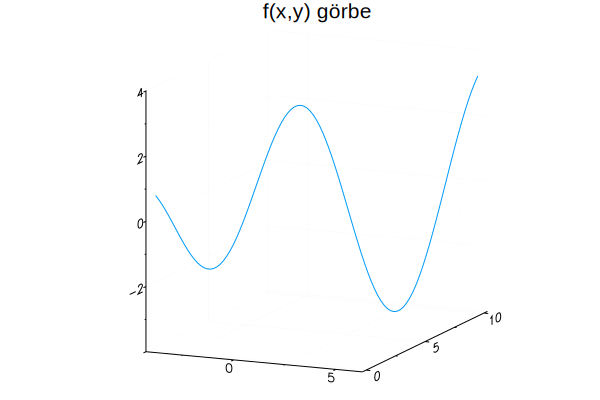

In [43]:
x=-4:0.1:6;
y=0:0.1:10;
f(x,y)=sin(x)+y*cos(x)*exp(-y/10)
plot(x,y,f.(x,y),title="f(x,y) görbe",legend=false)

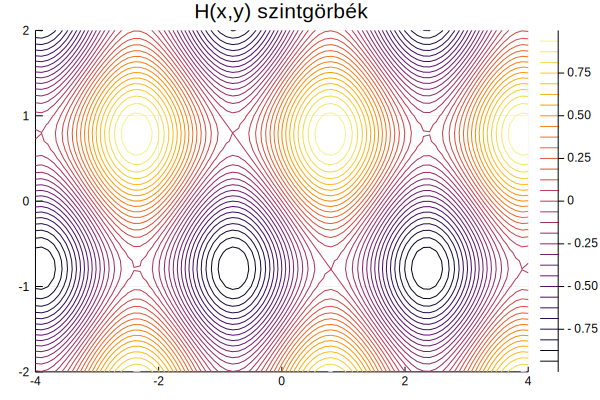

In [47]:
x=-4:0.1:4;
y=-2:0.1:2;
H(x,y)=cos(x-y)*sin(x+y)
plot(x,y,H,
    st=:contour,    #ezzel lesz kontúr
    levels=31,      #A kontúrok száma
    title="H(x,y) szintgörbék"
)

## 2019/12/05 Vektorok, animációk
[FEL](#Tartalomjegyzék)

### Kétdimenziós vektorok

Egy 2D vektor ábrázólásához 4 adatra van szükségünk:
* az $x_0,\,y_0$ koordinátákra a támadóponthoz
* az $x_1,\,y_1$ koordinátákra a végponthoz, DE legtöbbször a $\Delta x,\,\Delta y$ komponenseket ismerjük, vagy tudjuk könnyen kiszámolni a fázistérbeli sebességek esetében.  
Ábárzoljunk egy vektort amelynek támadópontja (1,2)-ben van és az $x$ és $y$ irányú komponensei 0.4, illetve 1.3!

In [1]:
using Plots

In [2]:
x_0=1.0; y_0=2.0;
Δx=0.4; Δy=1.3;


Tudva, hogy $x_1=x_0+\Delta x$:

In [3]:
x=[x_0, x_0+Δx];
y=[y_0, y_0+Δy];

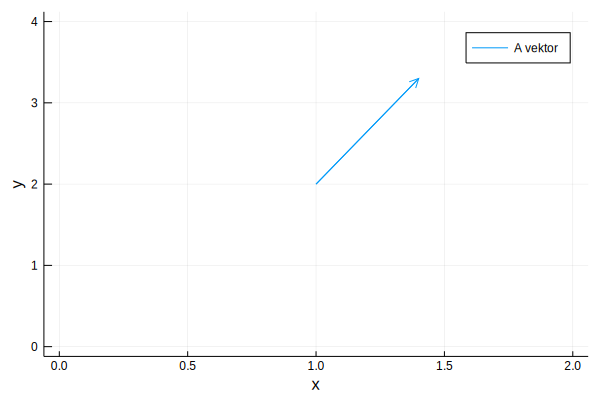

In [6]:
plot(x,y,arrow=:arrow,xlims=[0,2],ylims=[0,4],label="A vektor",xlabel="x",ylabel="y")

Ha a vektor modulusát akarjuk kiszámolni:

In [7]:
mod_v=sqrt(Δx^2+Δy^2)

1.3601470508735443

### Egyszerű animációk

Véletlenbolyongás 1.  

In [2]:
x=[0.];
y=[0.]; #itt lesznek a koordinatak
anim= @animate for i in 1:100  #100-szor szamolom ki az uj koordinatakat
    scatter([x[end]],[y[end]],color=:blue,xlims=[-0.1,0.1],ylims=[-0.1,0.1],framestyle=:origin,legend=false)
    push!(x,x[end]+0.01*(2*rand()-1))
    push!(y,y[end]+0.01*(2*rand()-1)) #az array-be pusholom az aktualis poziciot
    end every 2; # minden masodik kepet mentek el
gif(anim,"brown1.gif") #generalok egy gif-et a megfelelo nevvel

┌ Info: Saved animation to 
│   fn = /home/denes/Dropbox/Drd/DinR2019_20/dinren20192020ef/brown1.gif
└ @ Plots /home/denes/.julia/packages/Plots/h3o4c/src/animation.jl:95


Plots.AnimatedGif("/home/denes/Dropbox/Drd/DinR2019_20/dinren20192020ef/brown1.gif")

Véletlenbolyongás 2.

In [4]:
x=[0.];
y=[0.];
pl=plot( #keszitek egy elso plotot
    x,y,
    xlims=[-0.04,0.04],ylims=[-0.04,0.04],
    framestyle=:origin,
    legend=false,
    marker=2,
    markercolor=:red,
    markerstrokecolor=:red
)
anim= @animate for i in 1:200
    push!(x,x[end]+0.002*(2*rand()-1)) 
    push!(y,y[end]+0.002*(2*rand()-1))
    push!(pl,x[end],y[end]) #a plotba pusholom a pontokat, igy megmarad a trajektoria
end;
gif(anim,"brown2.gif")

┌ Info: Saved animation to 
│   fn = /home/denes/Dropbox/Drd/DinR2019_20/dinren20192020ef/brown2.gif
└ @ Plots /home/denes/.julia/packages/Plots/h3o4c/src/animation.jl:95


Plots.AnimatedGif("/home/denes/Dropbox/Drd/DinR2019_20/dinren20192020ef/brown2.gif")